In [2]:
import tables
import matplotlib.pyplot as plt
import numpy as np
import h5py

In [12]:
def readtime(path):
    coeff_time = []
    rd = []
    ra = np.arange(0.01,0.650,0.01)
    for i in ra:
        try:
            h = tables.open_file(path + '/file_%+.3f.h5' % i)
            coeff_time.append(h.root.coeff5[:])
            rd.append(i)
        except:
            pass
    coeff_time = np.array(coeff_time)
    '''
    for i in np.arange(5):
        plt.figure(num=i+1, dpi=300)
        plt.plot(ra[1:-2], coeff_time[1:-2,i])
        plt.xlabel('Radius/m')
        plt.ylabel('Legendre Coefficient of Time Info')
        plt.title('Time %d-th order, quantile = %.2f' % (i,0.01) )
        plt.savefig('/mnt/stage/douwei/Simulation/1t_root/fig/Time%d.pdf' % i)
        plt.show()
    '''
    return np.array(rd), coeff_time.T

(47,) (5, 47)


/opt/gentoo/usr/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/gentoo/usr/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/gentoo/usr/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/gentoo/usr/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/gentoo/usr/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


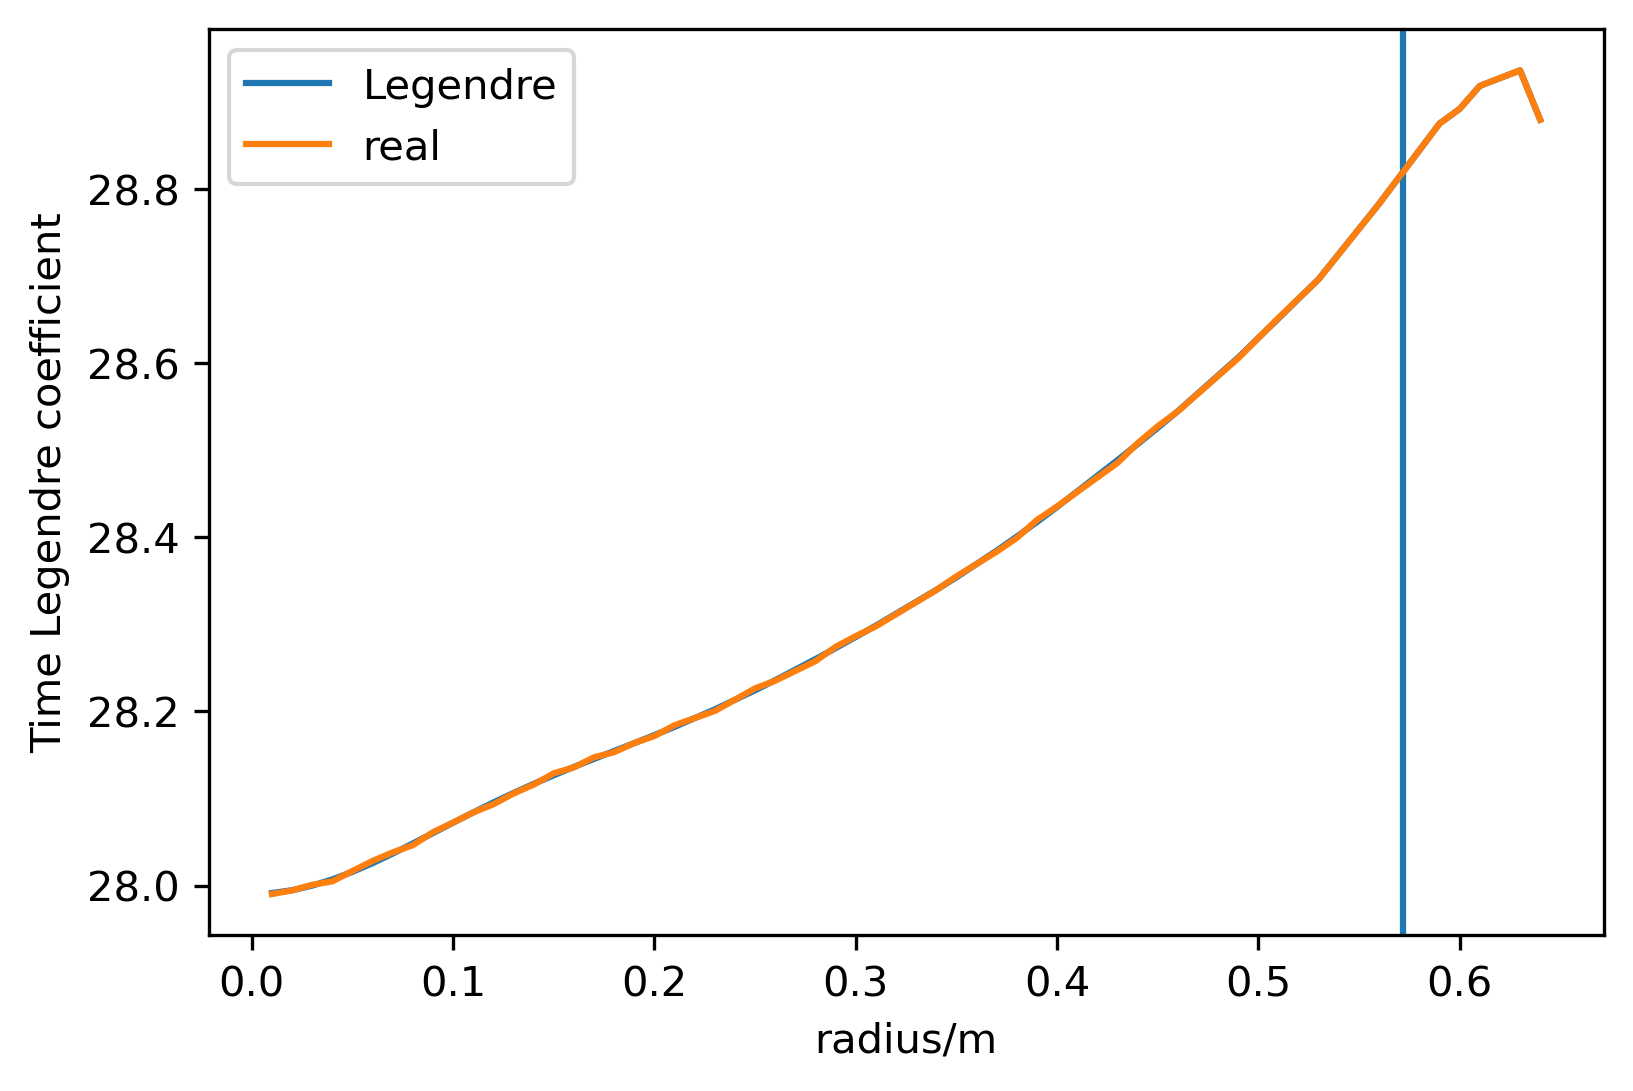

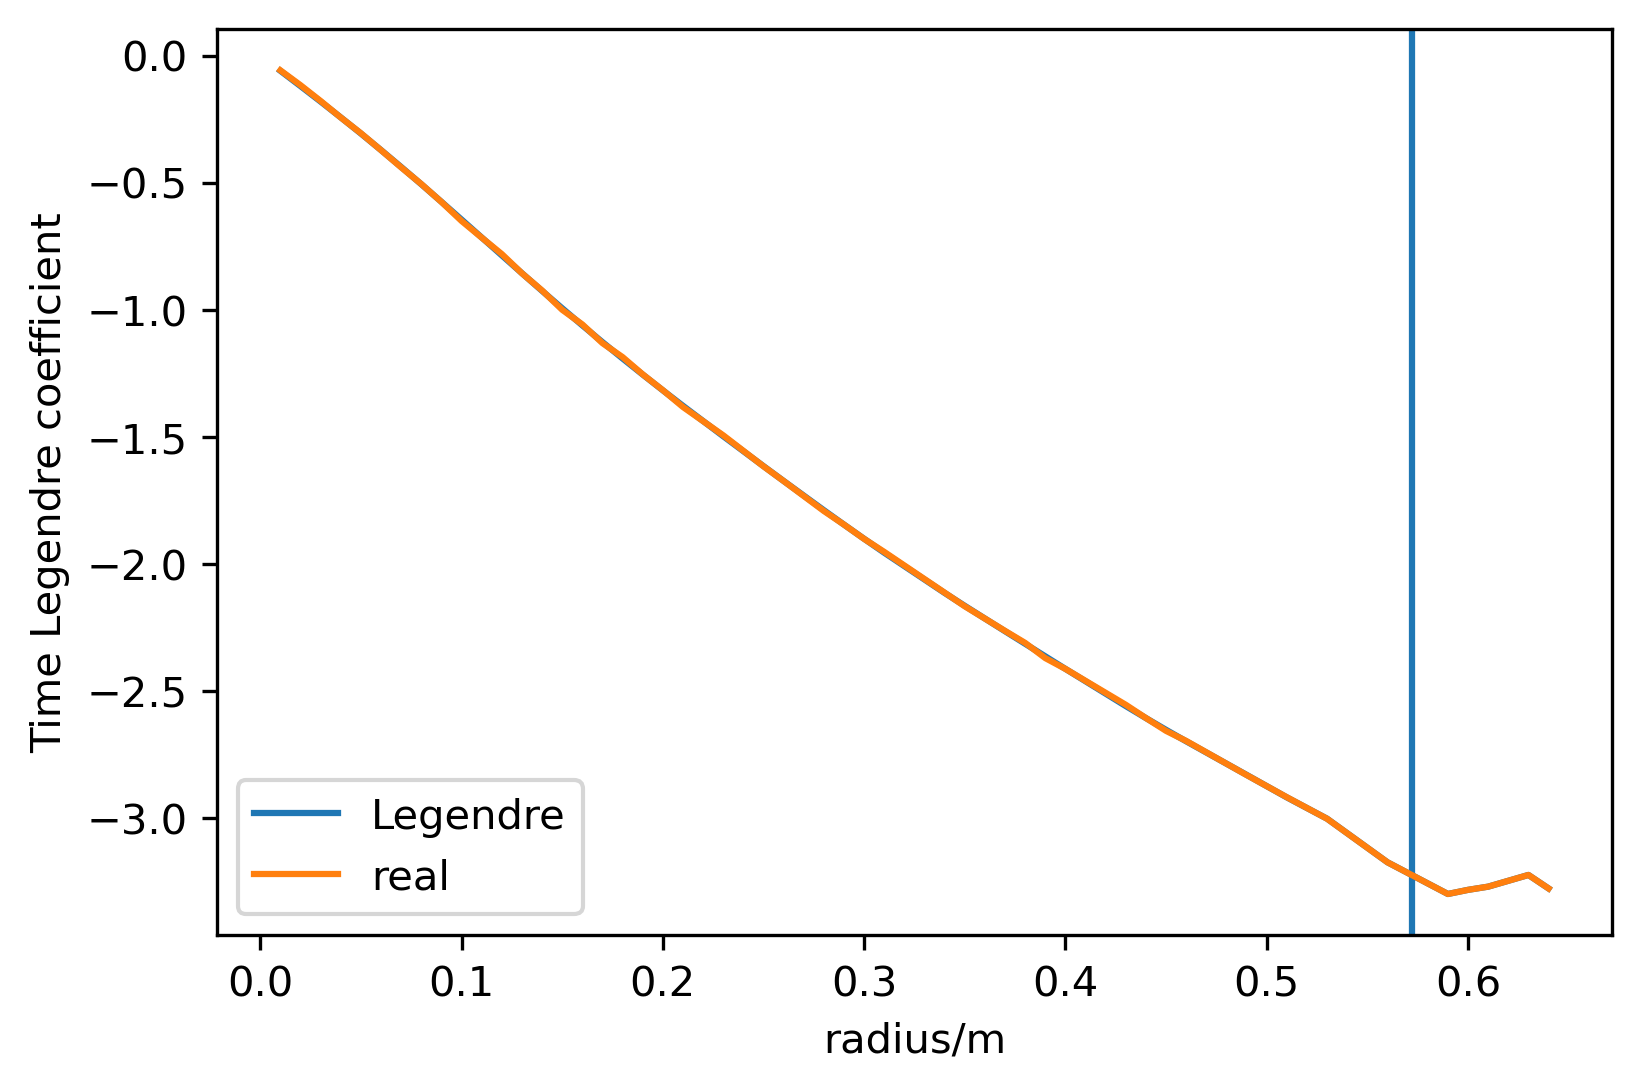

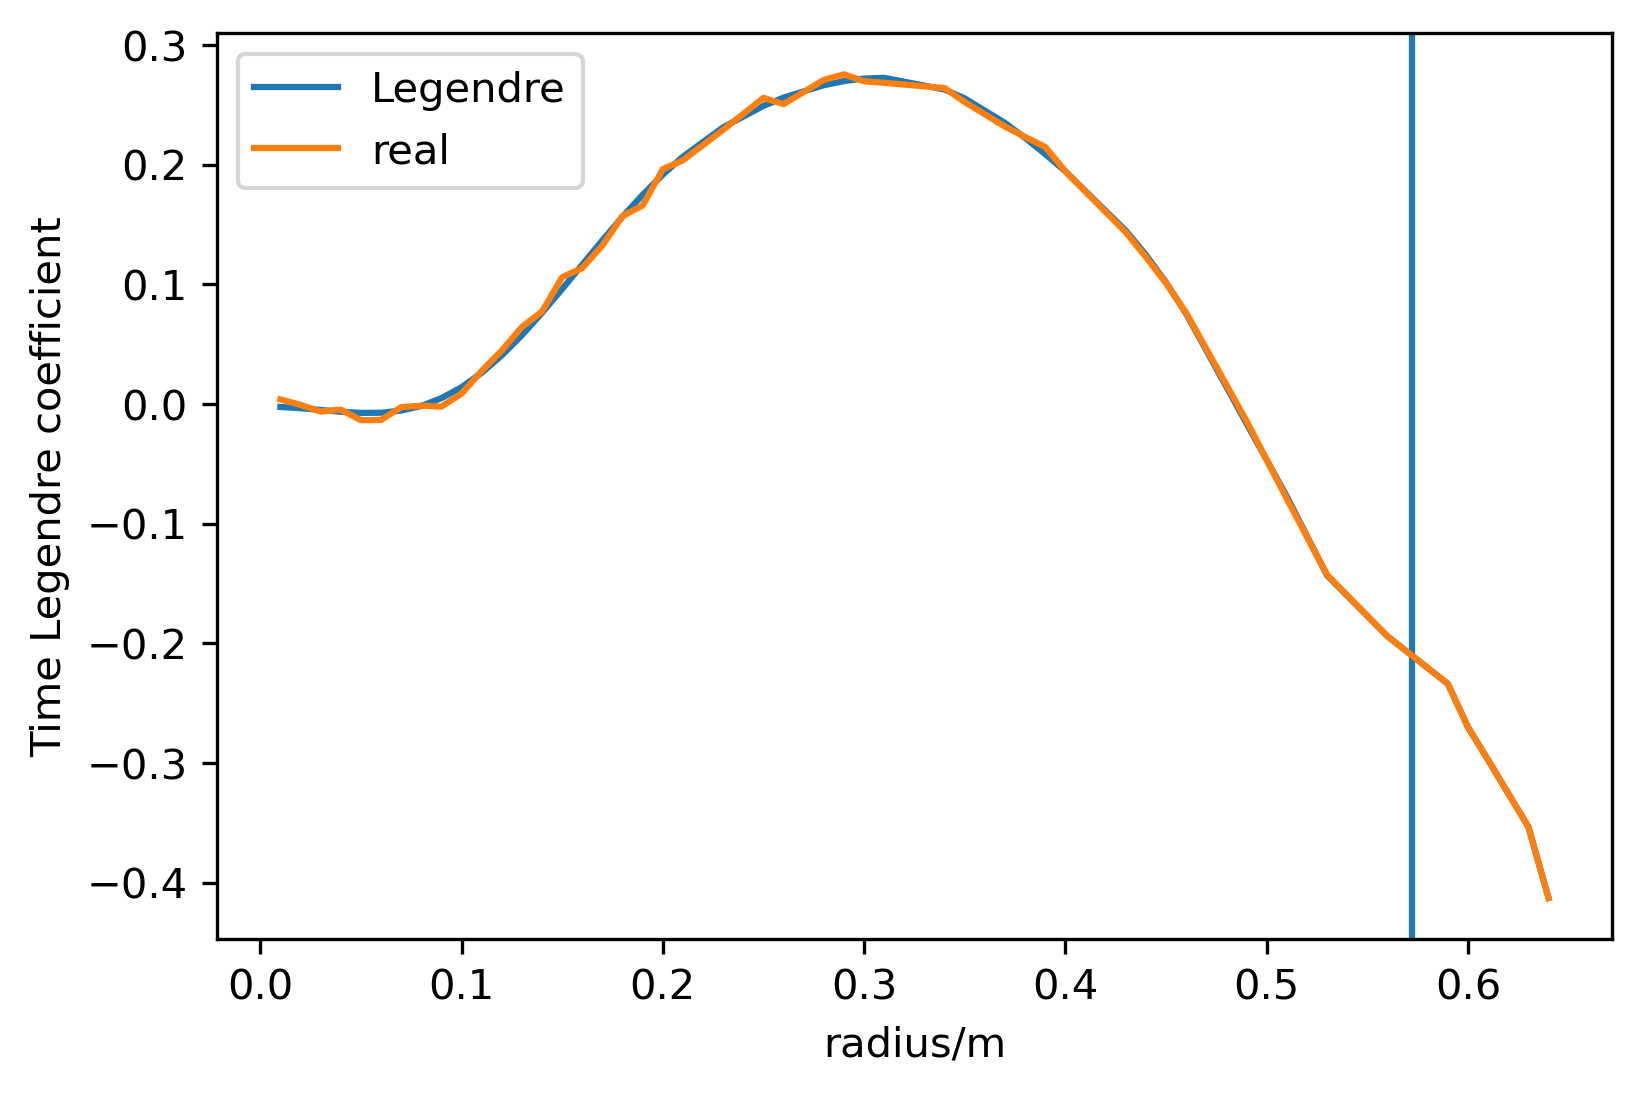

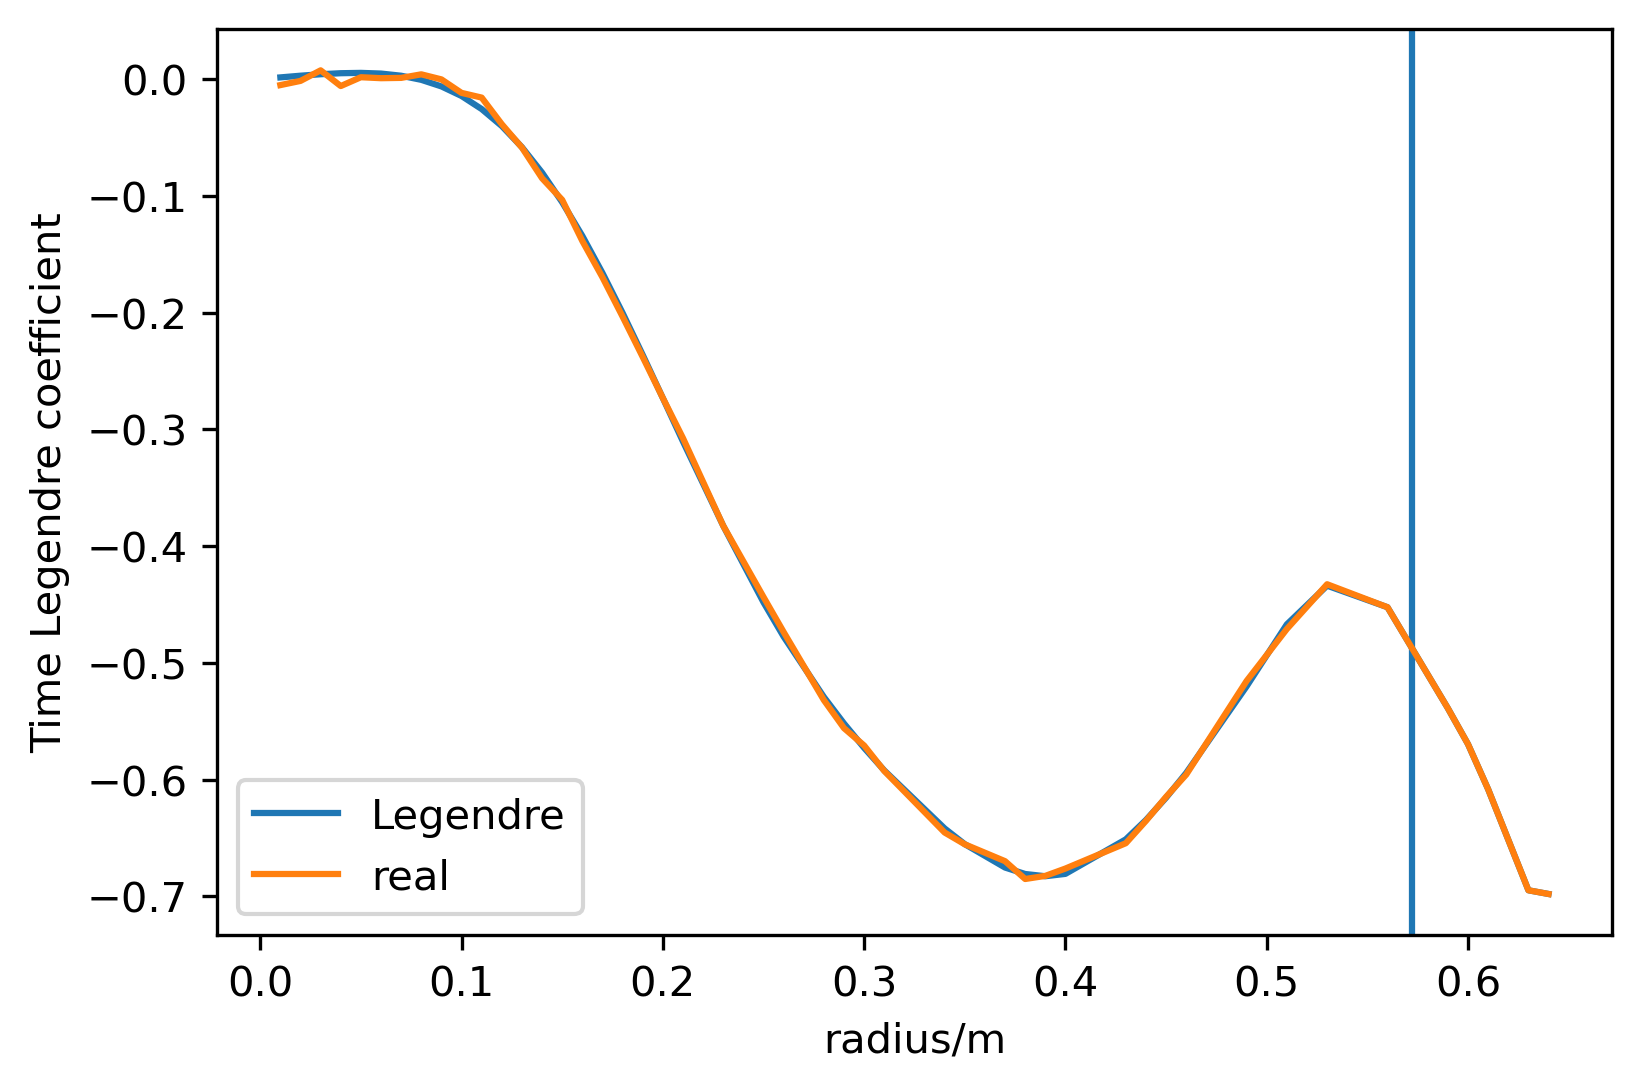

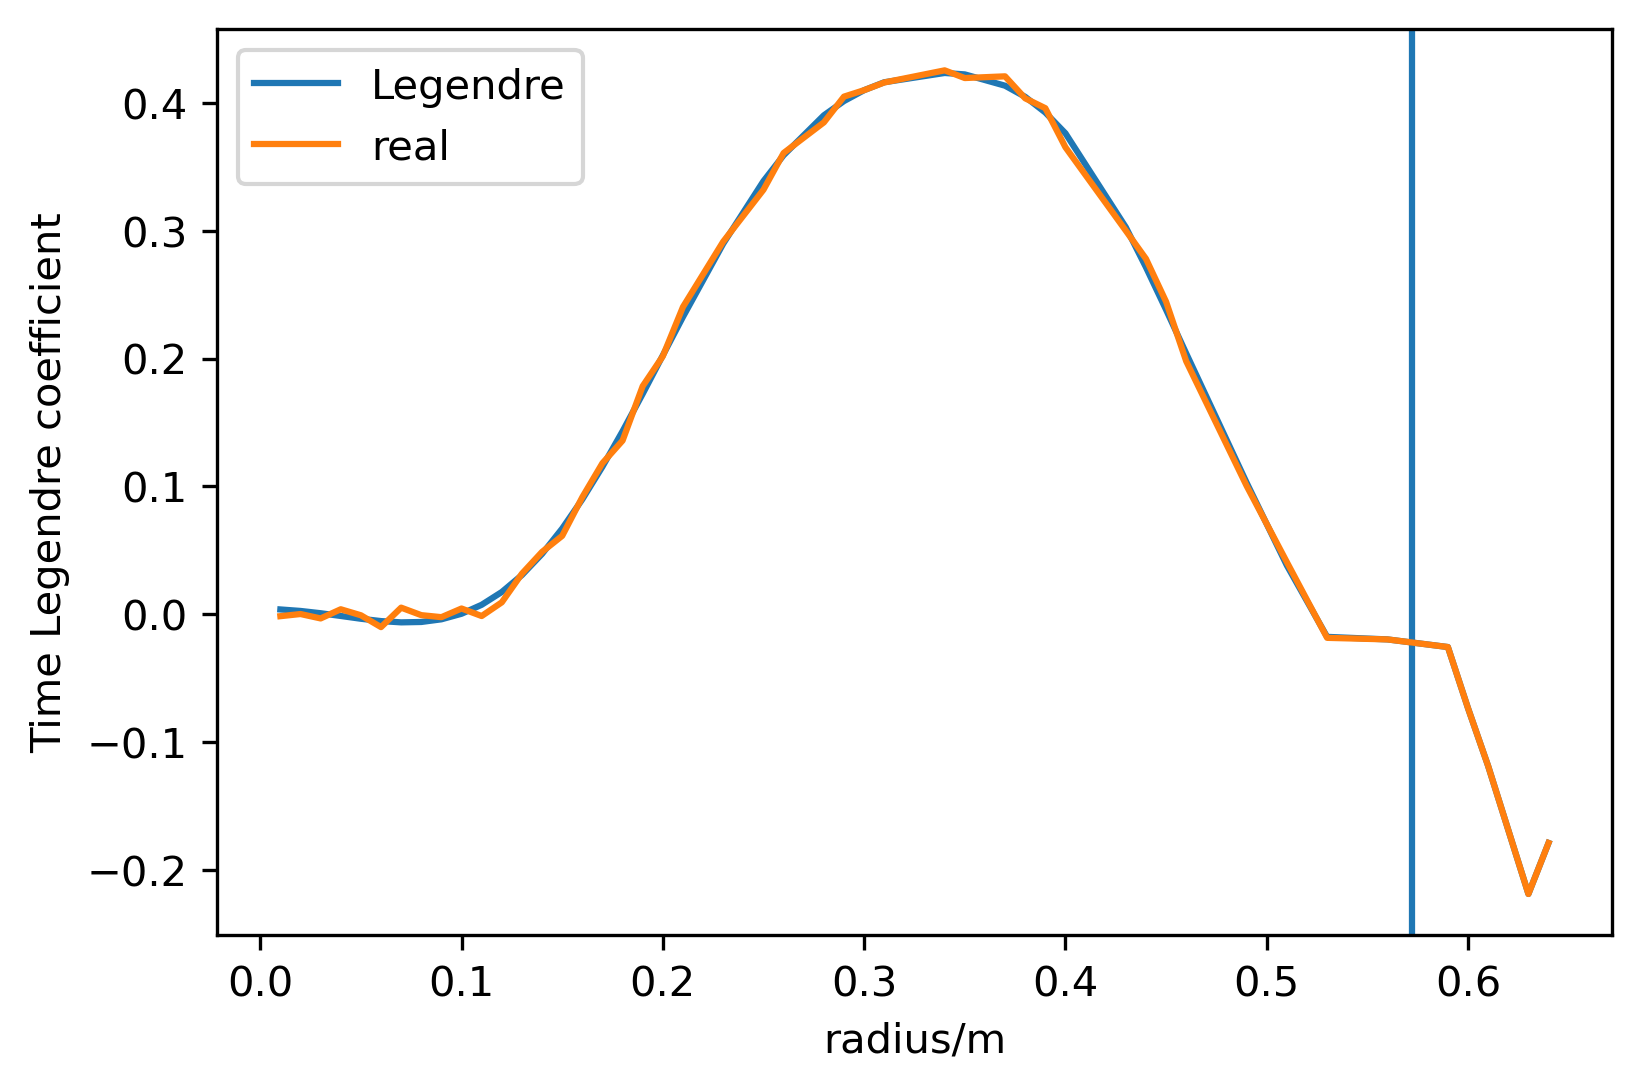

In [14]:
order = 5
fit_order = 10
rd, coeff_pe = readtime('./coeff_time_1t_8.0MeV_shell_0.1/')
print(rd.shape, coeff_pe.shape)

bd = 0.88
deg = 20
d = np.where(np.abs(rd-np.max(rd)*bd) == np.min(np.abs(rd-np.max(rd)*bd)))

for i in np.arange(order):
    index_in = (rd<=rd[d[0][0]])
    index_out = (rd>=rd[d[0][0]])

    if not i % 2:
        w_in = np.ones_like(rd[index_in])
        w_out = np.ones_like(rd[index_out])
        w_in[-1] = 1000
        w_out[0] = 1000
        if(i==0):
                w_in[-1] = 1000
        # Legendre coeff

        B_in, tmp = np.polynomial.legendre.legfit(np.hstack((rd[index_in]/np.max(rd),-rd[index_in]/np.max(rd))), \
                                                  np.hstack((coeff_pe[i,index_in], coeff_pe[i,index_in])), \
                                                  deg = deg, w = np.hstack((w_in,w_in)), full = True)

        y1_in = np.polynomial.legendre.legval(rd[index_in]/np.max(rd), B_in)
        
        B_out, tmp = np.polynomial.legendre.legfit(np.hstack((rd[index_out]/np.max(rd),-rd[index_out]/np.max(rd))), \
                                                  np.hstack((coeff_pe[i,index_out], coeff_pe[i,index_out])), \
                                                  deg = deg, w = np.hstack((w_out,w_out)), full = True)
        y1_out = np.polynomial.legendre.legval(rd[index_out]/np.max(rd), B_out)
        # polynormial coeff
        C_in = np.polyfit(np.hstack((rd[index_in]/np.max(rd),-rd[index_in]/np.max(rd))), \
                          np.hstack((coeff_pe[i,index_in], coeff_pe[i,index_in])), \
                          deg=deg)
        y2_in = np.polyval(C_in, rd[index_in]/np.max(rd))

        C_out = np.polyfit(np.hstack((rd[index_out]/np.max(rd),-rd[index_out]/np.max(rd))), \
                  np.hstack((coeff_pe[i,index_out], coeff_pe[i,index_out])), \
                  deg=deg)
        y2_out = np.polyval(C_out, rd[index_out]/np.max(rd))

    else:
        B_in, tmp = np.polynomial.legendre.legfit(np.hstack((rd[index_in]/np.max(rd),-rd[index_in]/np.max(rd))), \
                                                  np.hstack((coeff_pe[i,index_in], -coeff_pe[i,index_in])), \
                                                  deg=deg, w = np.hstack((w_in,w_in)), full=True)
        y1_in = np.polynomial.legendre.legval(rd[index_in]/np.max(rd), B_in)
        
        B_out, tmp = np.polynomial.legendre.legfit(np.hstack((rd[index_out]/np.max(rd),-rd[index_out]/np.max(rd))), \
                                                  np.hstack((coeff_pe[i,index_out], -coeff_pe[i,index_out])), \
                                                  deg=deg, w = np.hstack((w_out,w_out)), full=True)
        y1_out = np.polynomial.legendre.legval(rd[index_out]/np.max(rd), B_out)
        C_in = np.polyfit(np.hstack((rd[index_in]/np.max(rd),-rd[index_in]/np.max(rd))), \
                  np.hstack((coeff_pe[i,index_in], coeff_pe[i,index_in])), \
                  deg=deg)
        y2_in = np.polyval(C_in, rd[index_in]/np.max(rd))
        
        C_out = np.polyfit(np.hstack((rd[index_out]/np.max(rd),-rd[index_out]/np.max(rd))), \
                  np.hstack((coeff_pe[i,index_out], coeff_pe[i,index_out])), \
                  deg=deg)
        y2_out = np.polyval(C_out, rd[index_out]/np.max(rd))
 
    plt.figure(num = i+1, dpi = 300)
    plt.plot(rd, np.hstack((y1_in, y1_out[1:])), label = 'Legendre')
    plt.axvline(0.65*bd)
    #plt.plot(rd, np.hstack((y2_in, y2_out[1:])), label='poly')
    plt.plot(rd, coeff_pe[i], label='real')
    plt.xlabel('radius/m')
    plt.ylabel('Time Legendre coefficient')
    plt.legend()
    plt.savefig('Time')
#A = np.polynomial.legendre.Legendre.fit(np.array((-0.5,0.4)), np.array((0.5,0.6)),deg=5)

In [15]:
coeff_pe.shape

(5, 65)

In [11]:
coeff_pe[1]

array([1.54618741, 1.54513328, 1.54609839, 1.54797101, 1.54960095,
       1.55104295, 1.55214331, 1.55258876, 1.55382192, 1.55369214,
       1.55399185, 1.55309886, 1.55156556, 1.54947007, 1.54657882,
       1.54452472, 1.54142332, 1.53744282, 1.53390461, 1.52989728,
       1.52527892, 1.5208826 , 1.51523898, 1.51005842, 1.50455795,
       1.49908332, 1.49348086, 1.48812675, 1.48225554, 1.47545632,
       1.46952739, 1.46229624, 1.4561162 , 1.44921223, 1.44164916,
       1.43500425, 1.42747345, 1.42037122, 1.41257552, 1.40579577,
       1.39751089, 1.38959359, 1.38153671, 1.37459942, 1.36534731,
       1.35815238, 1.34986049, 1.34334492, 1.33578059, 1.32918004,
       1.321985  , 1.31766598, 1.31361936, 1.31158139, 1.31235563,
       1.31850491, 1.33360419, 1.31732012, 1.09739624, 0.92602463,
       0.77304659, 0.62386909, 0.47358713, 0.25036469])

In [25]:
print(coeff_pe[1][51],coeff_pe[1][57])
np.interp(rd[51:58],np.array((rd[51], rd[57])), np.array((coeff_pe[1][51],coeff_pe[1][57])))

1.3176659813028813 1.3173201179640508


array([1.31766598, 1.31760834, 1.31755069, 1.31749305, 1.31743541,
       1.31737776, 1.31732012])

/usr/lib64/python3.6/site-packages/IPython/core/interactiveshell.py:3319: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


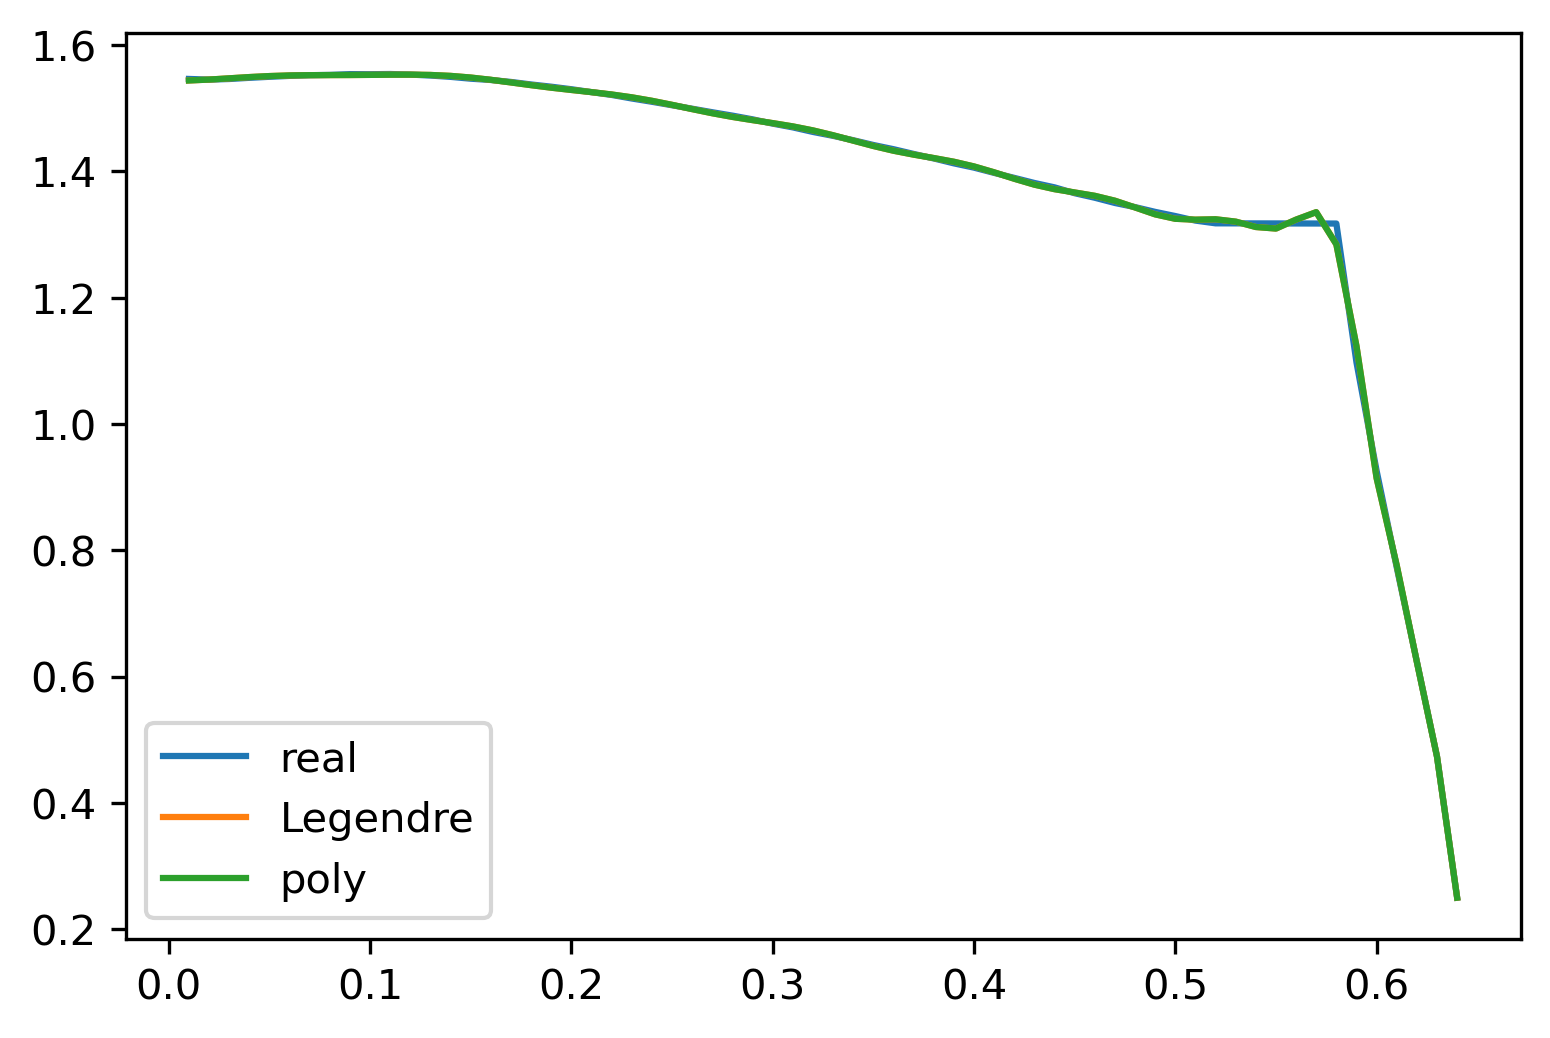

/usr/lib64/python3.6/site-packages/IPython/core/interactiveshell.py:3319: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


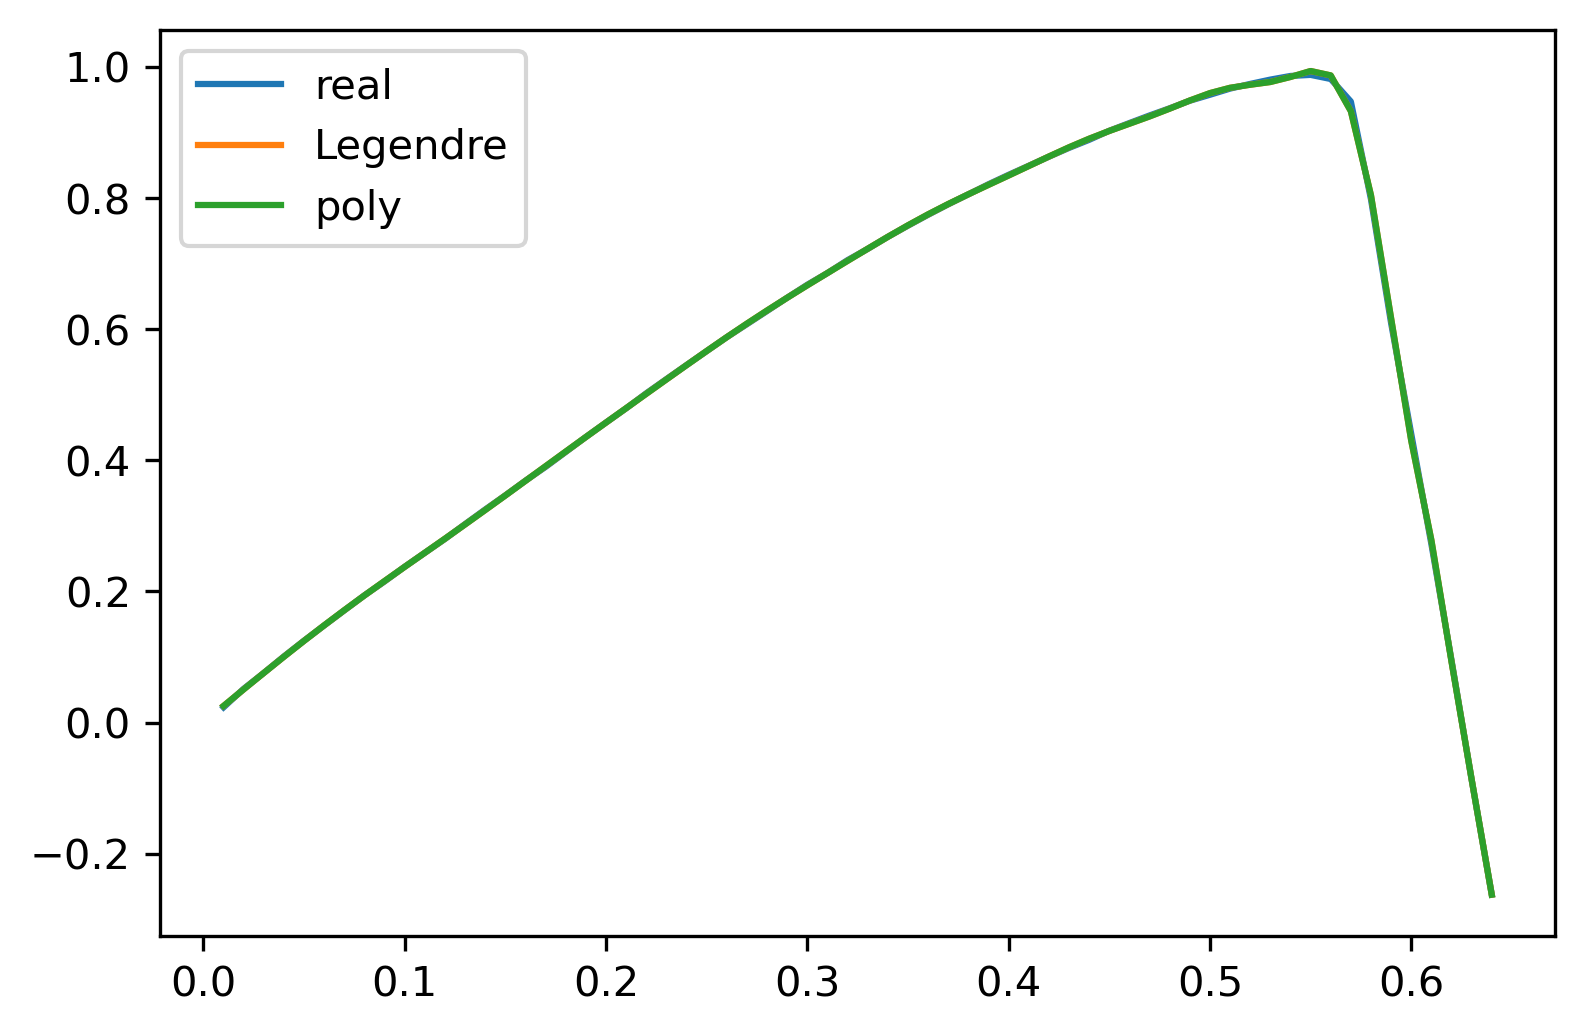

/usr/lib64/python3.6/site-packages/IPython/core/interactiveshell.py:3319: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


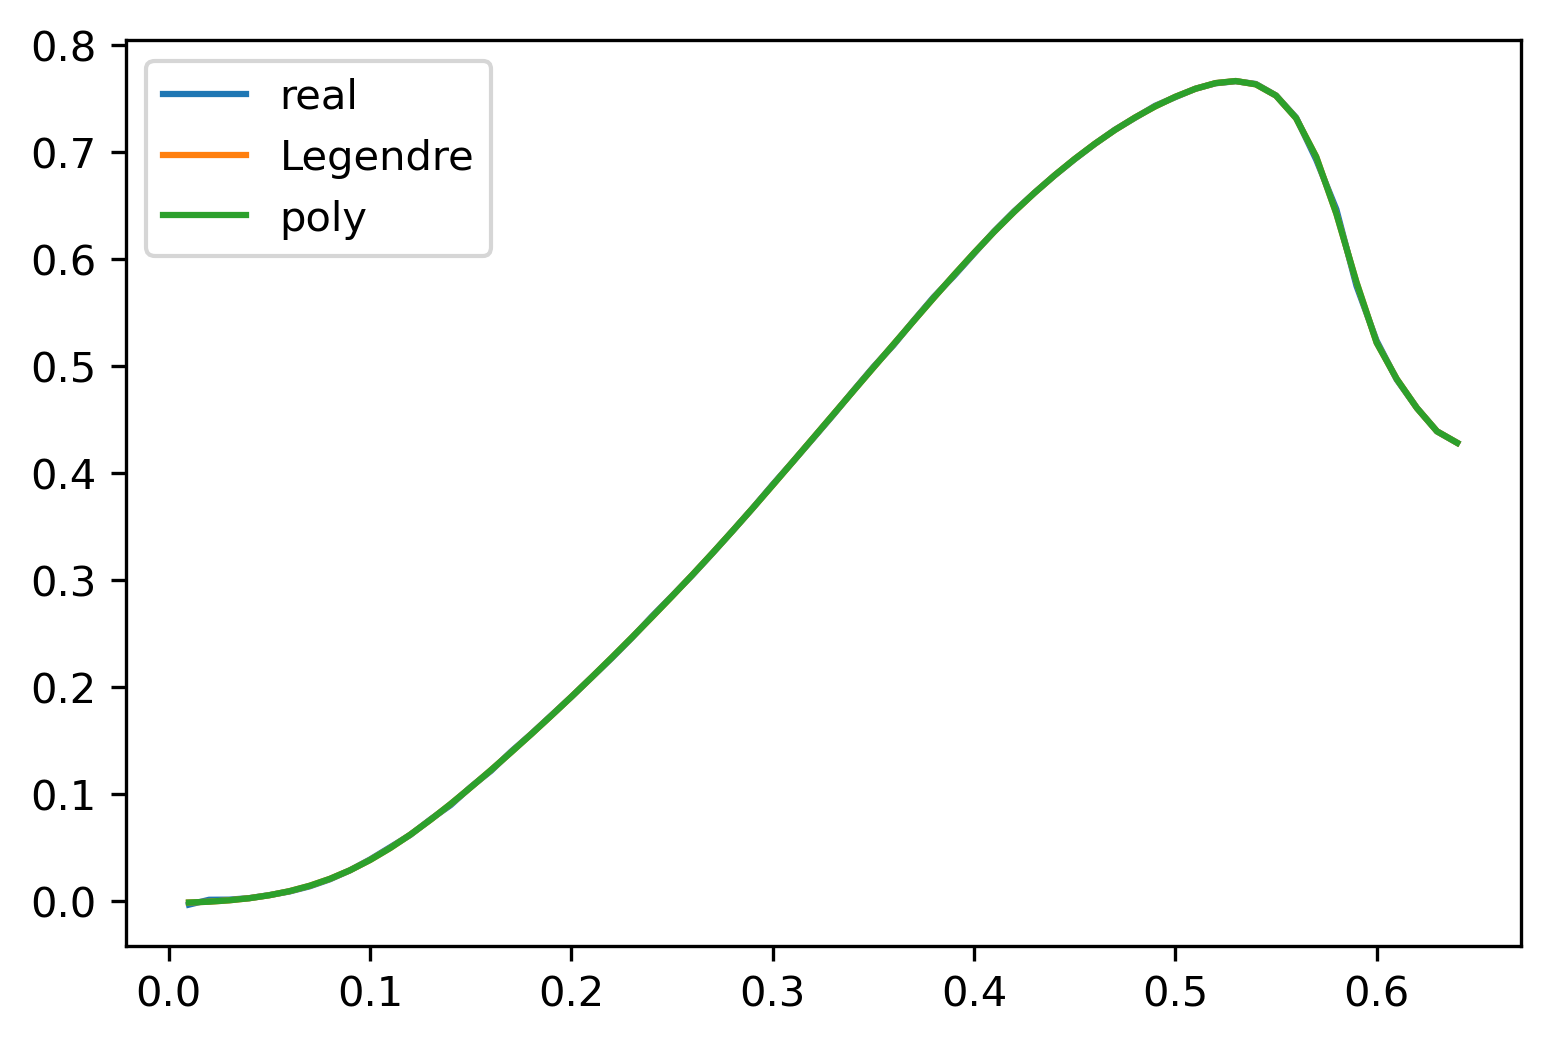

/usr/lib64/python3.6/site-packages/IPython/core/interactiveshell.py:3319: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


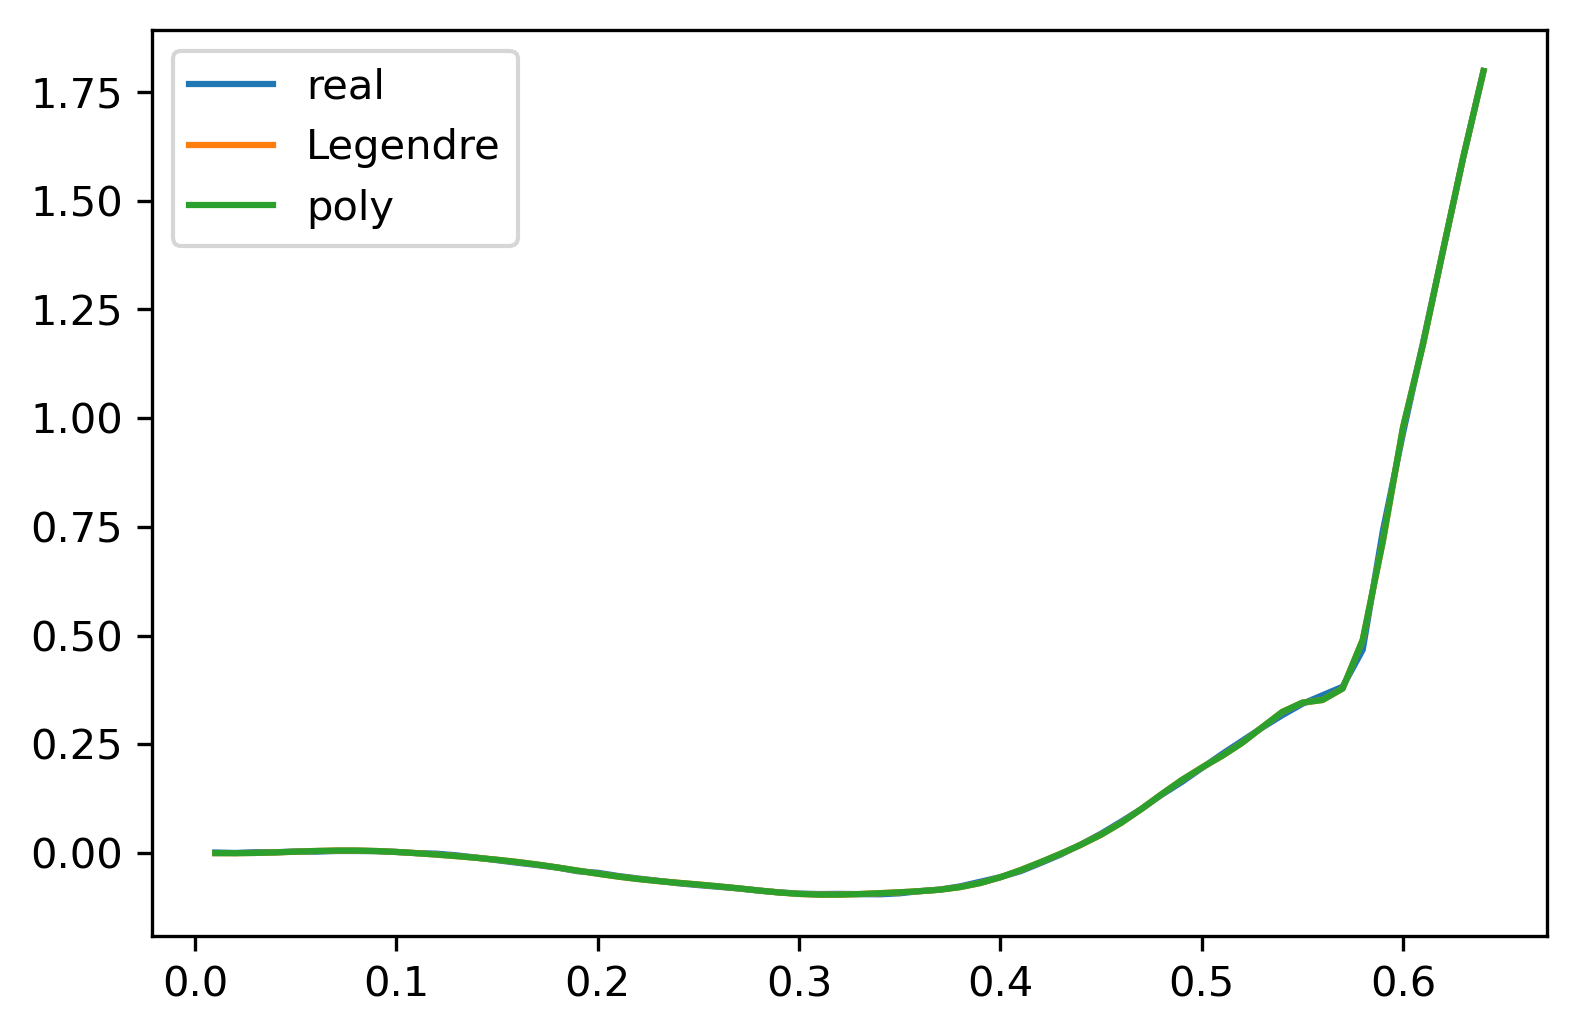

/usr/lib64/python3.6/site-packages/IPython/core/interactiveshell.py:3319: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


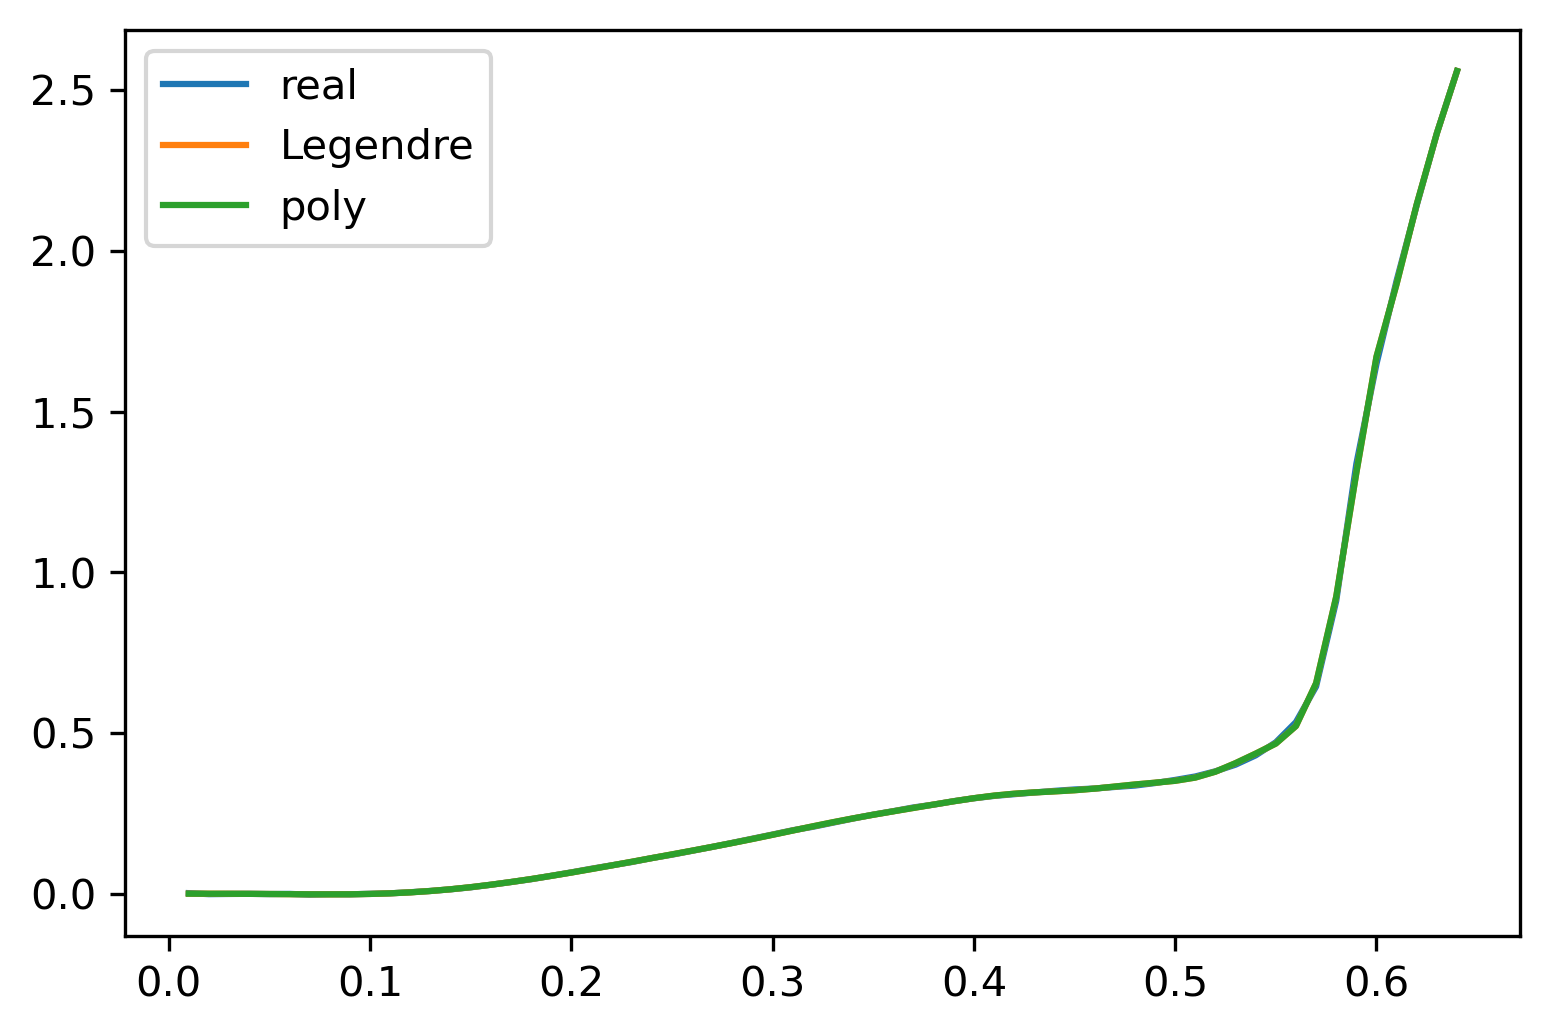

In [41]:
def LoadDataPE_TW(path, radius, order):
    data = []
    filename = path + 'file_' + radius + '.h5'
    h = tables.open_file(filename,'r')
    coeff = 'coeff' + str(order)
    hess = 'hess' + str(order)
    data = eval('np.array(h.root.'+ coeff + '[:])')
    h.close()
    return data

def main_photon(path, order):
    ra = np.arange(0.01, 0.65, 0.01)
    rd = []
    coeff_pe = []
    for radius in ra:
        str_radius = '%+.3f' % radius
        coeff= LoadDataPE_TW(path, str_radius, order)
        rd.append(np.array(radius))
        coeff_pe = np.hstack((coeff_pe, coeff)) 
    coeff_pe = np.reshape(coeff_pe,(-1,np.size(rd)),order='F')
    return rd, coeff_pe

order = 5
fit_order = 10
rd, coeff_pe = main_photon('coeff_pe_1t_shell_200000/',order)
rd = np.array(rd)
coeff_pe = np.array(coeff_pe)
#coeff_pe[1][55] = (coeff_pe[1][54] + coeff_pe[1][57])/2 + (coeff_pe[1][54] - coeff_pe[1][57])*1/3 
#coeff_pe[1][56] = (coeff_pe[1][54] + coeff_pe[1][57])/2 + (coeff_pe[1][54] - coeff_pe[1][57])*1/3 
coeff_pe[1][51:58] = np.interp(rd[51:58],np.array((rd[51], rd[57])), np.array((coeff_pe[1][51],coeff_pe[1][57])))
_fit_coeff = np.zeros((order, fit_order))

bd = 0.88
deg = 40
d = np.where(np.abs(rd-np.max(rd)*bd) == np.min(np.abs(rd-np.max(rd)*bd)))

for i in np.arange(order):

    if not i % 2:
        # Legendre coeff

        B, tmp = np.polynomial.legendre.legfit(np.hstack((rd/np.max(rd),-rd/np.max(rd))), \
                                                  np.hstack((coeff_pe[i+1], coeff_pe[i+1])), \
                                                  deg = deg, full = True)

        y1 = np.polynomial.legendre.legval(rd/np.max(rd), B)
        
        C = np.polyfit(np.hstack((rd/np.max(rd),-rd/np.max(rd))), \
                          np.hstack((coeff_pe[i+1], coeff_pe[i+1])), \
                          deg=deg)
        y2 = np.polyval(C, rd/np.max(rd))
    else:
        B, tmp = np.polynomial.legendre.legfit(np.hstack((rd/np.max(rd),-rd/np.max(rd))), \
                                                  np.hstack((coeff_pe[i+1], - coeff_pe[i+1])), \
                                                  deg = deg, full = True)

        y1 = np.polynomial.legendre.legval(rd/np.max(rd), B)
        
        C = np.polyfit(np.hstack((rd/np.max(rd),-rd/np.max(rd))), \
                          np.hstack((coeff_pe[i+1], -coeff_pe[i+1])), \
                          deg=deg)
        y2 = np.polyval(C, rd/np.max(rd))
    plt.figure(num = i+1, dpi = 300)
    plt.plot(rd, coeff_pe[i+1], label='real')
    plt.plot(rd, y1, label = 'Legendre')
    plt.plot(rd, y1, label = 'poly')
    plt.legend()
    plt.show()
#A = np.polynomial.legendre.Legendre.fit(np.array((-0.5,0.4)), np.array((0.5,0.6)),deg=5)

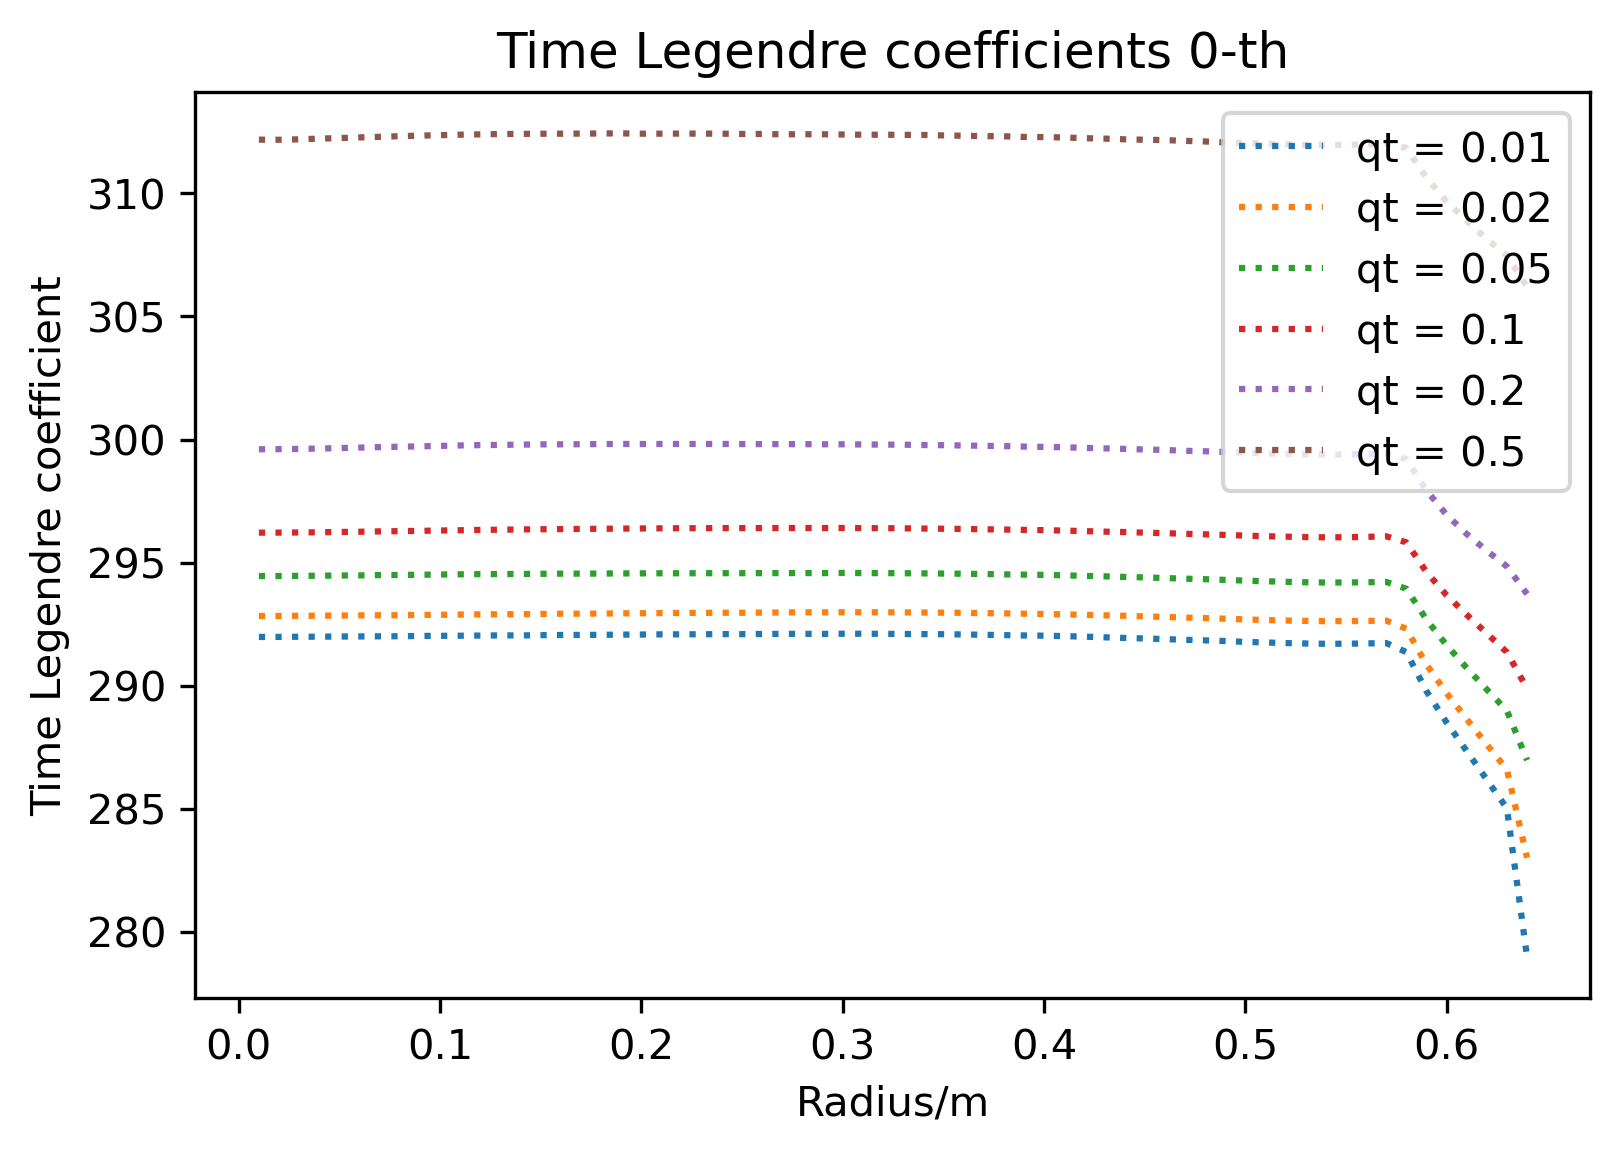

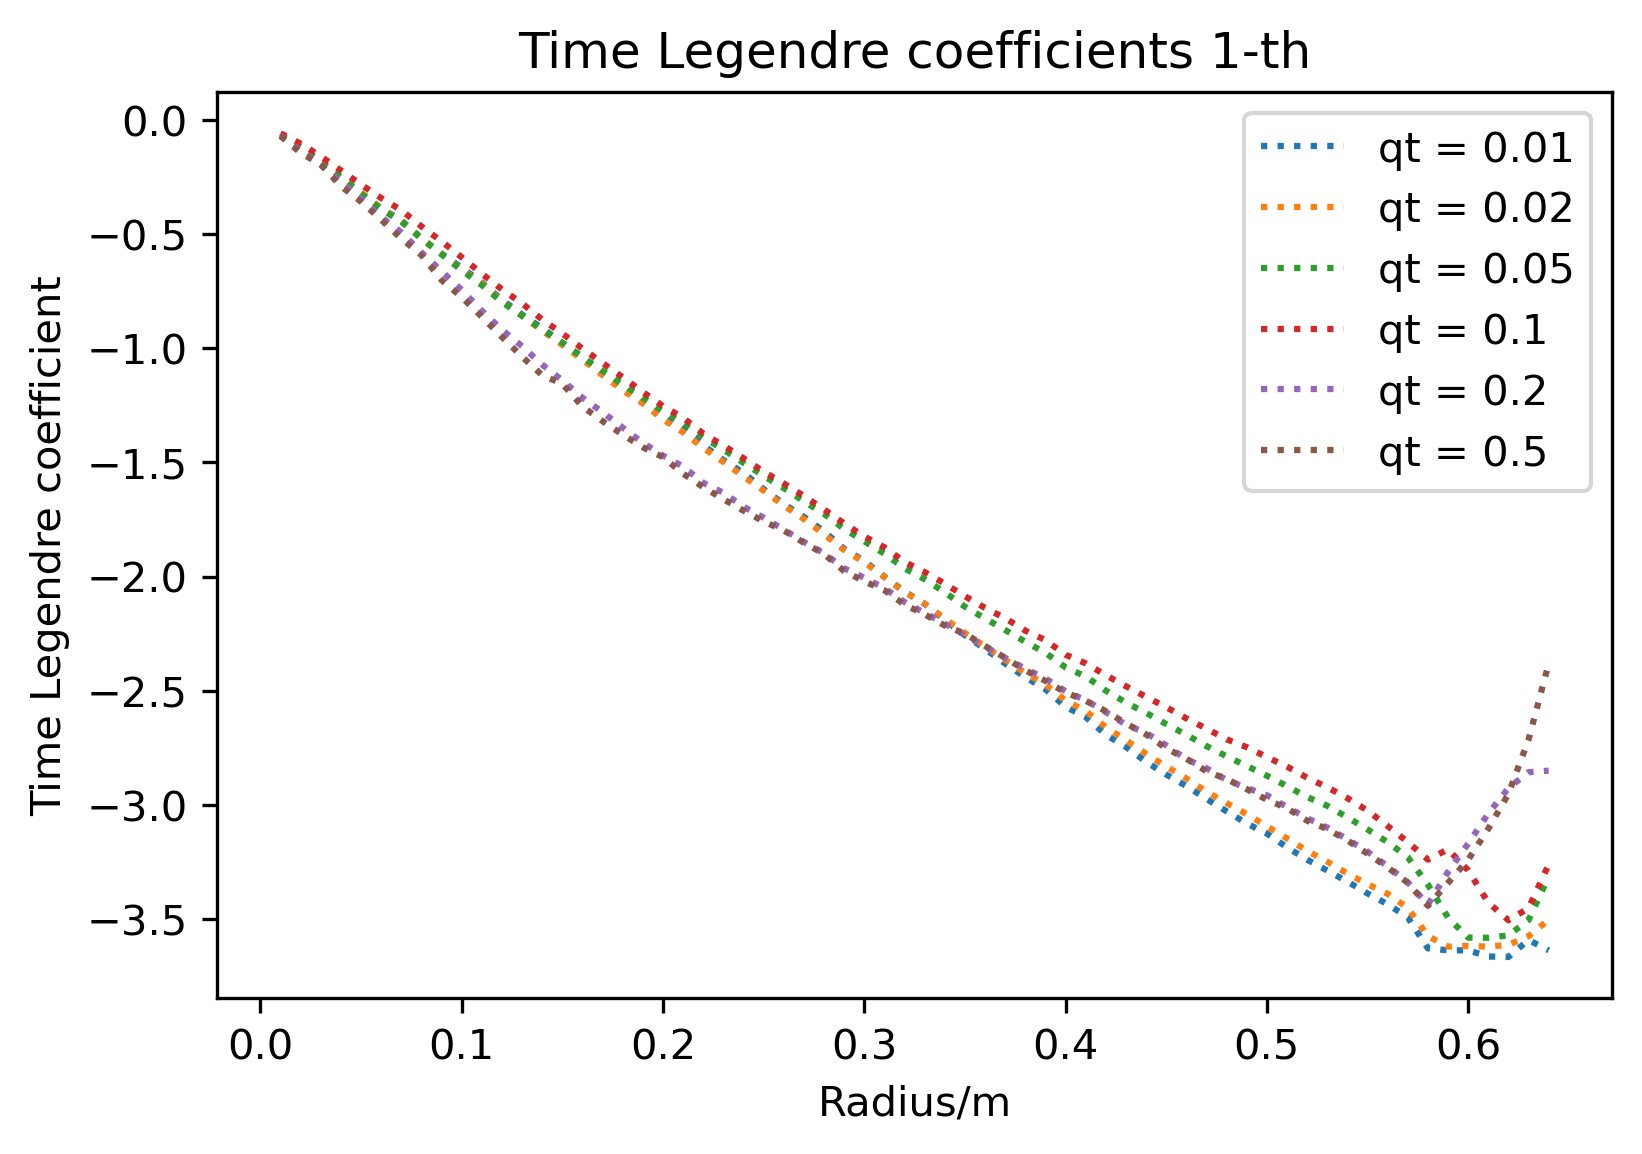

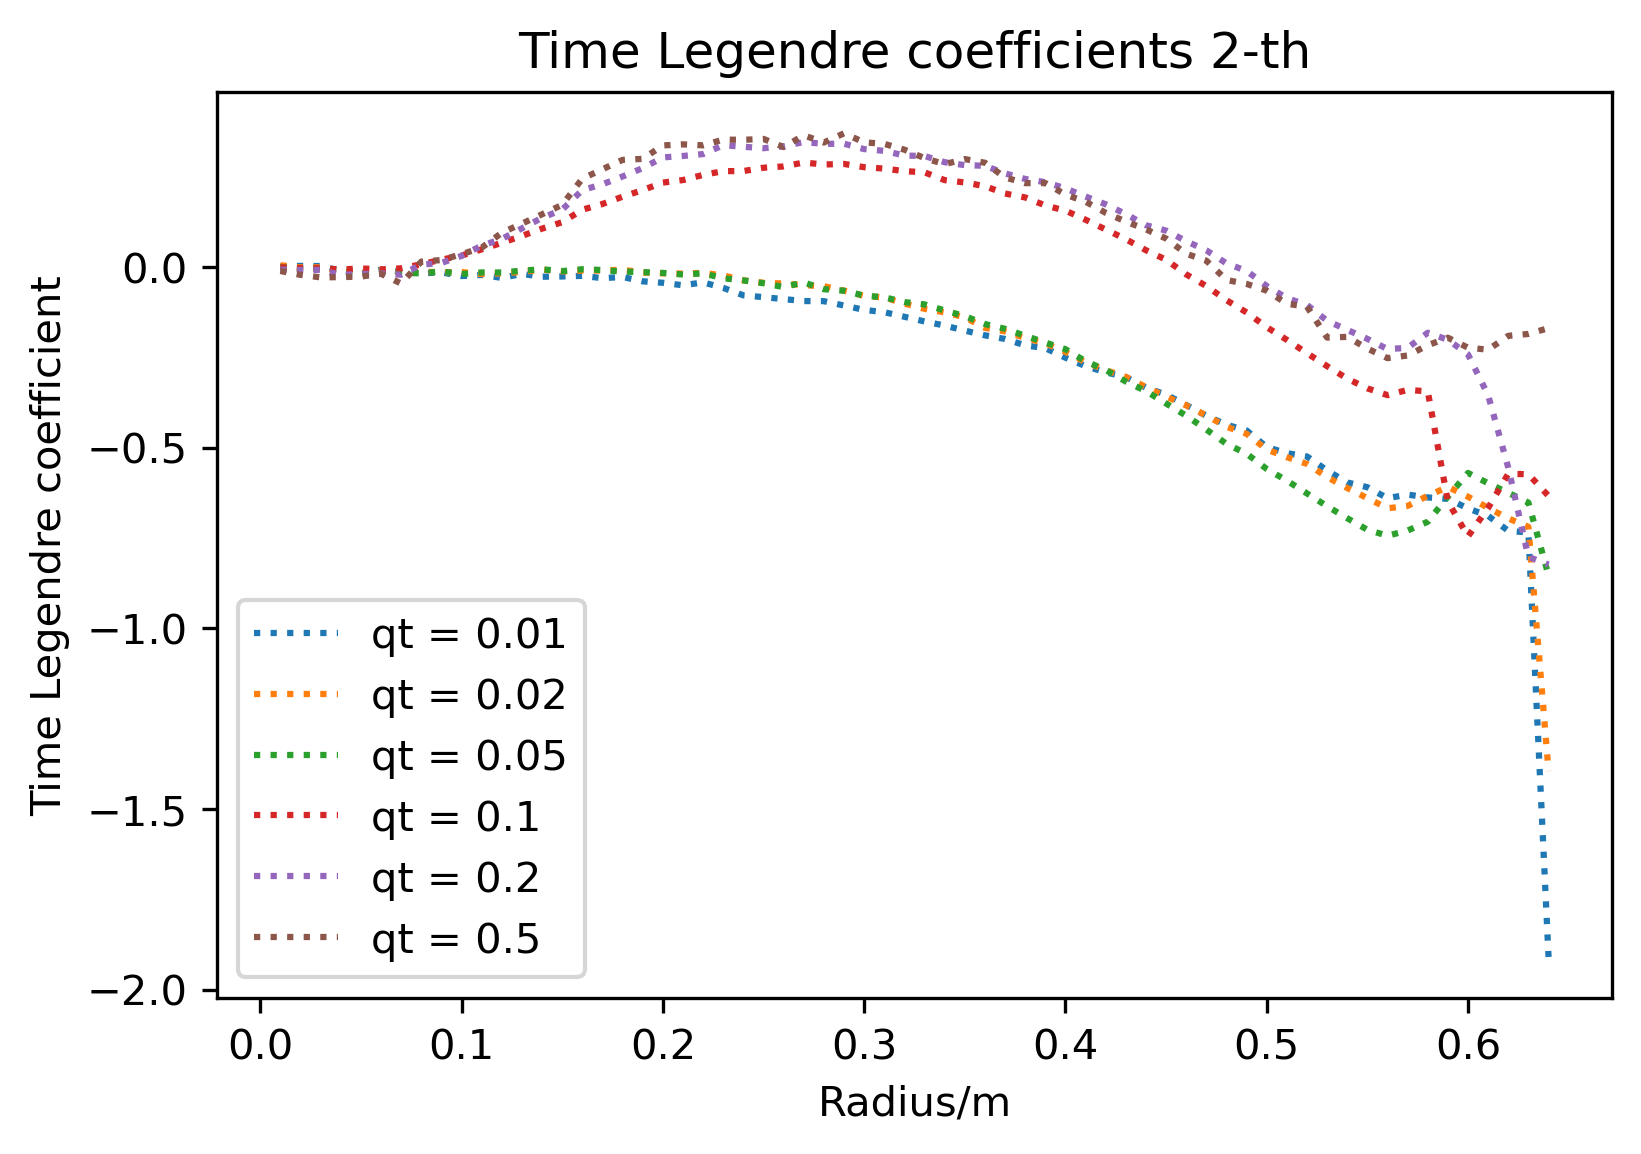

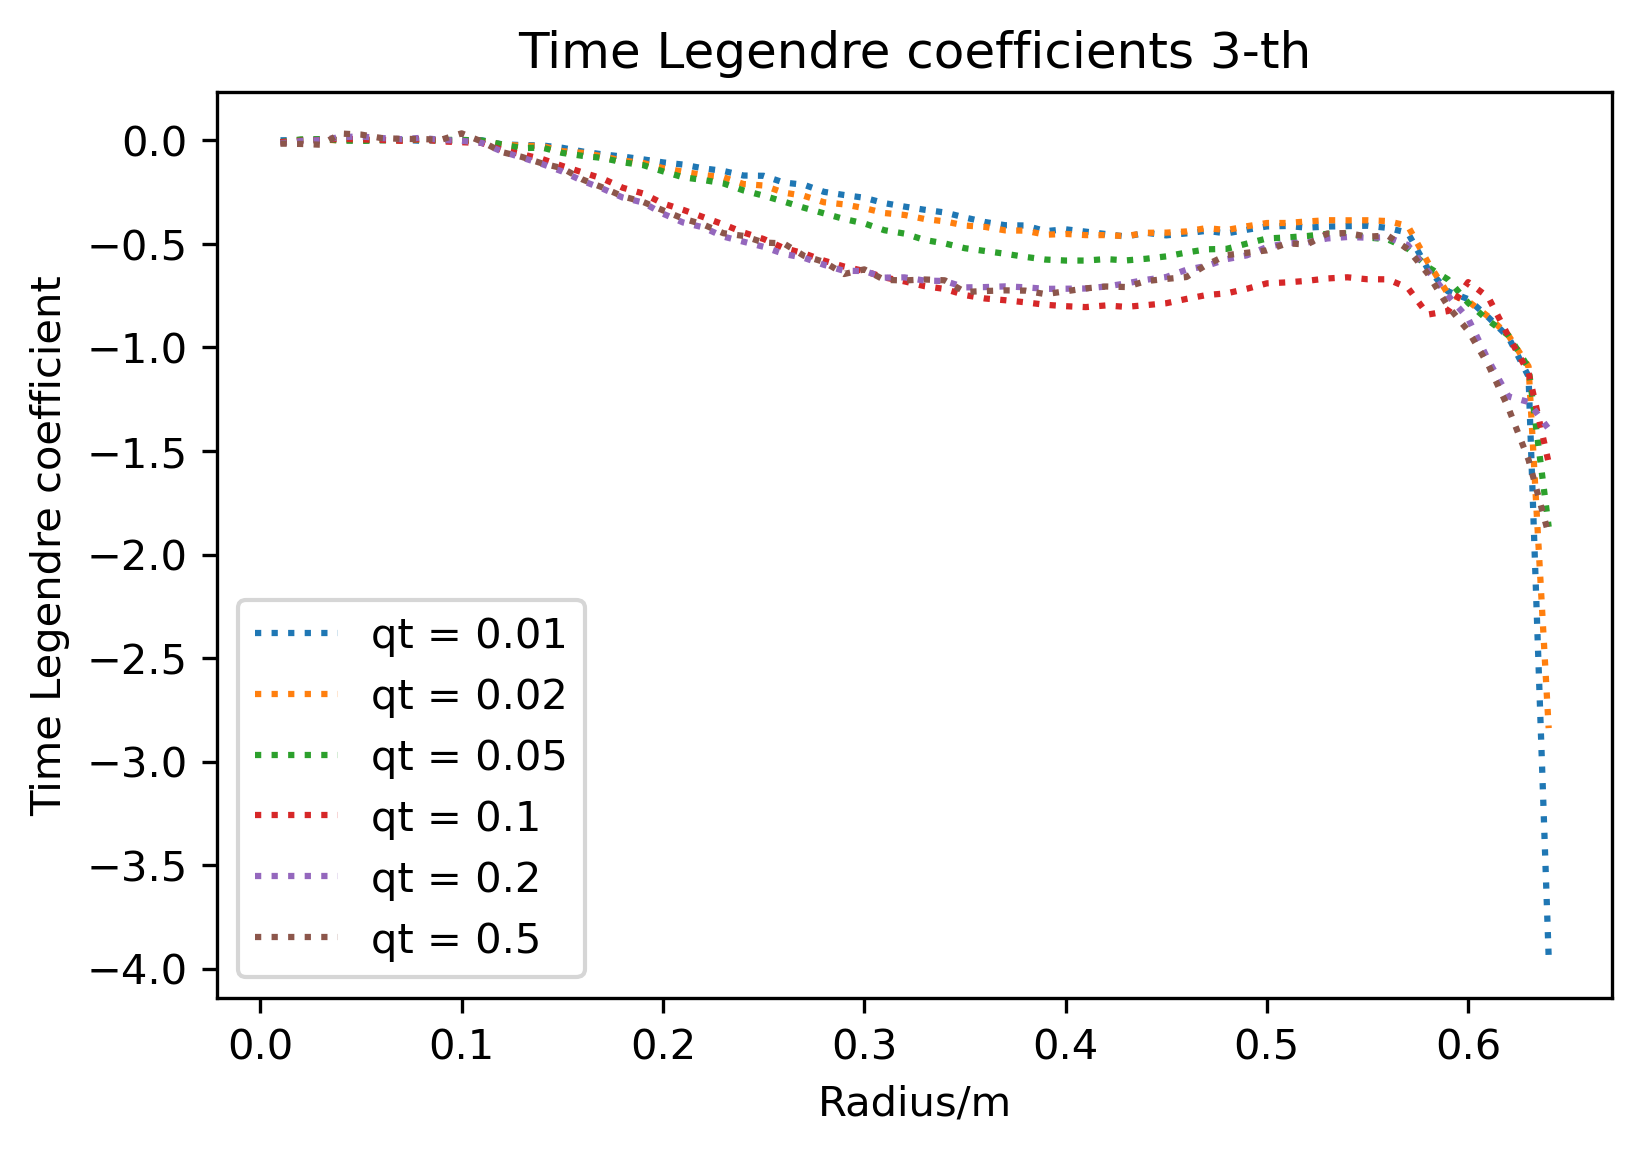

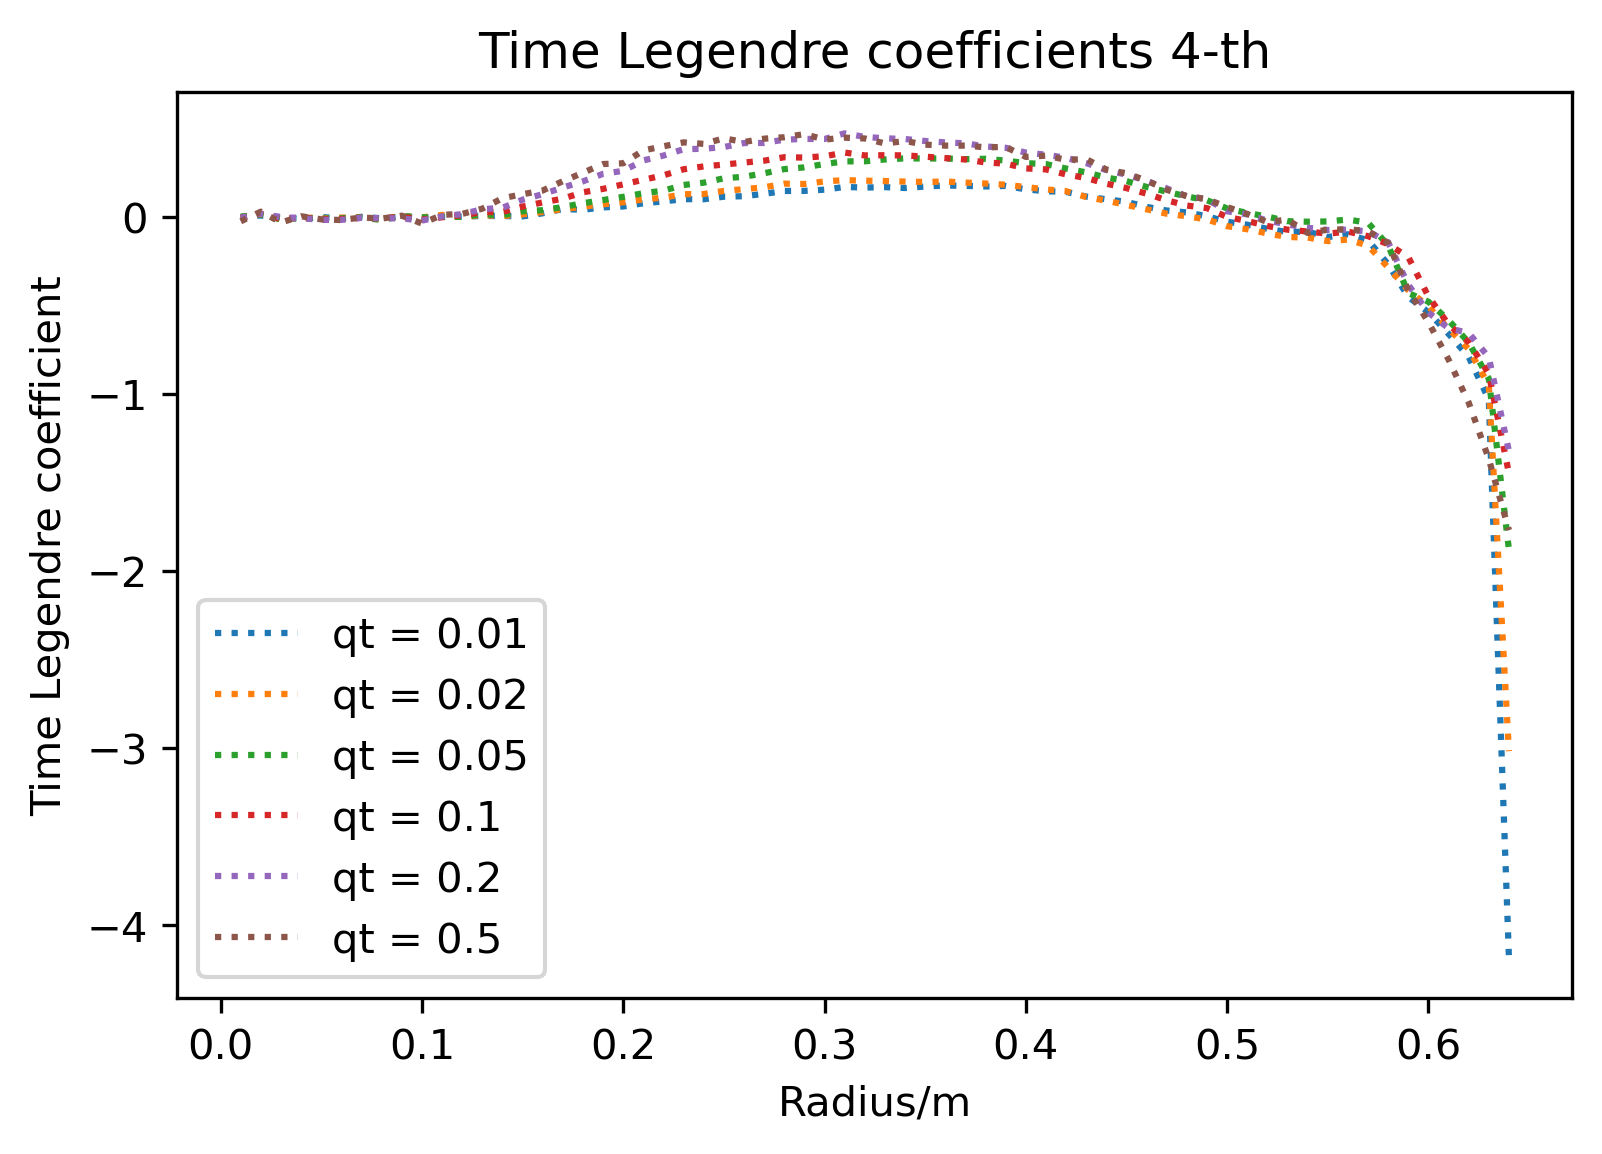

In [32]:
qts = np.array((0.01,0.02,0.05,0.1,0.2,0.5))
order = 5
fit_order = 10
for qt in qts:
    rd, coeff_pe = readtime('./coeff_time_1t_shell_200000_%.2f/' % qt)

    bd = 0.88
    deg = 10
    d = np.where(np.abs(rd-np.max(rd)*bd) == np.min(np.abs(rd-np.max(rd)*bd)))

    for i in np.arange(order):
        plt.figure(num=i+1,dpi=300)
        plt.plot(rd, coeff_pe[i], label=f'qt = {qt}', linestyle='dotted')
        plt.xlabel('Radius/m')
        plt.ylabel('Time Legendre coefficient')
        plt.legend()
        plt.title('Time Legendre coefficients %d-th' % i)
        plt.savefig('coeff_Time_%d.png' % i)
#A = np.polynomial.legendre.Legendre.fit(np.array((-0.5,0.4)), np.array((0.5,0.6)),deg=5)